# MALARIA DETECTION

### Lets take a look at how we are gonna make our model 

#### Step 1:  Loading and Splitting of the Dataset

- The first step is to load the data and scaling the images to binary 0 and 1 from Parasitized and Uninfected.
- Then we will resize the images to 50 x 50 
- After that suffling of the images before train-test-split and converting the images to a single numpy array
- Splitting the data 
- Converting the type of X_train and X_valid to float32
- Add then One Hot Encoding on y


#### Step 2:  Building the CNN model
- The CNN model is one of the efficient nueral networks for images and performing classifications. We will use tf.keras to build the CNN model.
- We will build a Sequential CNN model.
- We will build a CNN Layer followed by MaxPooling layer which is later followed by BatchNormalisation to normalize the previous layer's output and implement the Dropout regularization. After that we will use Flatten to the outputs. Then the last layer that has function Softmax is the output layer.
- Finally we have to compile the CNN model. We will use optimizer called Adam then will apply the loss function as categorical_crossentropy and an evaluation metric as accuracy.
- Next step is to use the fit function, to train our convolutional neural network (CNN) with X_train and y_train. Lets set the total amounts of epochs as 25 epochs, which is essentially 25 cycles or iterations of the full dataset including a batch size of 120.

####  Step 3 : Predictions and Testing of the Model
- After this we will predict and do evaluation on the builded model. 
- The last step will be to test our model on the HOLDOUT DATASET and making predictions.

### Importing Libraries

In [ ]:
# importing the libraries for loading data and visualisation
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
import seaborn as sns

# import for train-test-split
from sklearn.model_selection import train_test_split

# import for One Hot Encoding
from keras.utils import to_categorical

# importing libraries for Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# importing libraries for evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Loading Data and Train-Test-Split 

In [2]:
# loading the data of images and setting their labels
data = []
labels = []

Parasitized = os.listdir("input/cell_images/train/Parasitized/")

for a in Parasitized:
    
    try:
        image = cv2.imread("input/cell_images/train/Parasitized/" + a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    
    except AttributeError:
        print("Error0")

Uninfected = os.listdir("input/cell_images/train/Uninfected/")

for b in Uninfected:

    try:
        image = cv2.imread("input/cell_images/train/Uninfected/" + b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    
    except AttributeError:
        print("Error1")

# Creating single numpy array of all the images and labels
data = np.array(data)
labels = np.array(labels)

print('Cells : {} and labels : {}'.format(data.shape , labels.shape))

# lets shuffle the data and labels before splitting them into training and testing sets
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]

Cells : (27558, 50, 50, 3) and labels : (27558,)


In [3]:
### Splitting the dataset into the Training set and Test set

X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.2, random_state = 0)

print('Train data shape {} ,Test data shape {} '.format(X_train.shape, X_valid.shape))

Train data shape (22046, 50, 50, 3) ,Test data shape (5512, 50, 50, 3) 


In [4]:
X_train = X_train.astype('float32')  
X_valid = X_valid.astype('float32')

In [5]:
# One Hot Encoding 
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
y_train

## Building Model

In [6]:
# Defining Model
classifier = Sequential()

# CNN layers
classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))   # Dropout prevents overfitting

classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=2, activation='softmax')) 

In [7]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = classifier.fit(X_train, y_train, batch_size=120, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/15
184/184 [==============================] - 52s 279ms/step - loss: 1.0050 - accuracy: 0.5873 - val_loss: 1.5677 - val_accuracy: 0.5073
Epoch 2/15
184/184 [==============================] - 52s 280ms/step - loss: 0.6220 - accuracy: 0.6772 - val_loss: 1.6807 - val_accuracy: 0.4985
Epoch 3/15
184/184 [==============================] - 51s 279ms/step - loss: 0.4930 - accuracy: 0.7628 - val_loss: 3.6013 - val_accuracy: 0.5060
Epoch 4/15
184/184 [==============================] - 55s 297ms/step - loss: 0.4056 - accuracy: 0.8119 - val_loss: 0.8884 - val_accuracy: 0.6433
Epoch 5/15
184/184 [==============================] - 53s 288ms/step - loss: 0.3229 - accuracy: 0.8642 - val_loss: 0.8181 - val_accuracy: 0.5063
Epoch 6/15
184/184 [==============================] - 54s 295ms/step - loss: 0.2471 - accuracy: 0.9019 - val_loss: 0.2960 - val_accuracy: 0.8828
Epoch 7/15
184/184 [==============================] - 61s 330ms/step - loss: 0.2216 - accuracy: 0.9127 - val_loss: 0.9174 - val_ac

In [9]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(X_valid, y_valid)[1]*100))

173/173 [==============================] - 4s 21ms/step - loss: 0.1355 - accuracy: 0.9494
Test_Accuracy: 94.94%


-  Summary of the Model

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

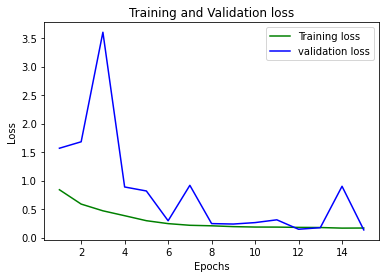

In [11]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

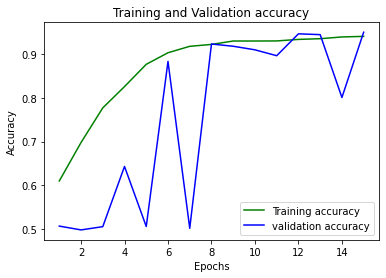

In [12]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Prediction, Evaluation and Testing of the Model

- Lets do our first prediction using predict and predict X_valid and store in y_pred variable

In [13]:
y_pred = classifier.predict(X_valid)

In [14]:
# Convert back to categorical values 
y_pred = np.argmax(y_pred, axis=1)
y_valid = np.argmax(y_valid, axis=1)

In [15]:
print('Accuracy Score: ', accuracy_score(y_valid, y_pred))

Accuracy Score:  0.9493831640058055


- Evaluation of the CNN model by Plotting Confusion Matrix 

<AxesSubplot:>

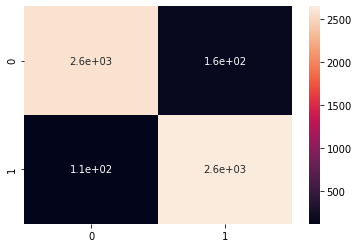

In [16]:
# Plotting the Confusion Matrix
conf = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf, annot=True)

In [ ]:
classifier.save("malaria-model.h5")